<a href="https://colab.research.google.com/github/kcms2ll/AI-Study/blob/main/ETest/src/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/rabbit_challenge/DNN_code')
import numpy as np
import matplotlib.pyplot as plt
from common import functions

# 順伝播

In [4]:
def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    print("shape: " + str(vec.shape))
    print("")

In [5]:
# 重み
W = np.array([[0.1],[0.2]])
print_vec('重み', W)

# バイアス
b = np.array(0.5)
print_vec('バイアス', b)

# 入力値
x = np.array([2, 3])
print_vec('入力', x)

# 総入力
u = np.dot(x, W) + b
print_vec('総入力', u)

*** 重み ***
[[0.1]
 [0.2]]
shape: (2, 1)

*** バイアス ***
0.5
shape: ()

*** 入力 ***
[2 3]
shape: (2,)

*** 総入力 ***
[1.3]
shape: (1,)



# 活性化関数

In [6]:
# ステップ関数
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [7]:
# シグモイド関数
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [8]:
def relu(x):
  return np.maximum(0, x)

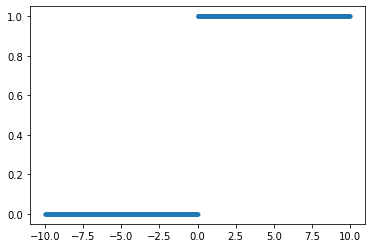

In [9]:
x = np.array(range(-1000, 1000))
x = x/100
y = [step_function(i) for i in x]

plt.scatter(x, y, marker='.')
plt.show()

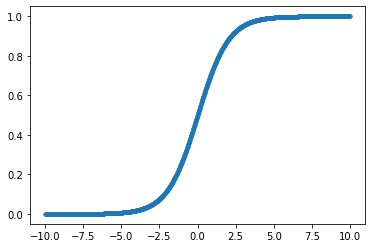

In [10]:
y = [sigmoid(i) for i in x]

plt.scatter(x, y, marker='.')
plt.show()

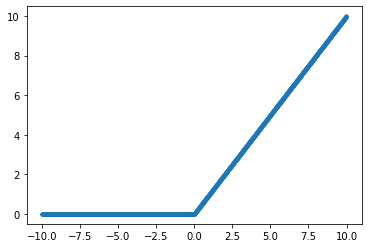

In [11]:
y = [relu(i) for i in x]

plt.scatter(x, y, marker='.')
plt.show()

# 出力層

## 交差エントロピー

In [12]:
def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)

    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size

## ソフトマックス

In [13]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

## 平均二乗誤差

In [14]:
def mean_squared_error(d, y):
  return np.mean(np.sqare(d - y)) / 2

# 勾配降下法

In [15]:
def gradient_descent():
  for dataset in random_datasets:
      x, d = dataset['x'], dataset['d']
      z1, y = forward(network, x)
      grad = backward(x, d, z1, y)
      # パラメータに勾配適用
      for key in ('W1', 'W2', 'b1', 'b2'):
          network[key]  -= learning_rate * grad[key]

      # 誤差
      loss = functions.mean_squared_error(d, y)
      losses.append(loss)

# 誤差逆伝播法

In [16]:
# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])

    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])

    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    
    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    print("##### 順伝播開始 #####")

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    u2 = np.dot(z1, W2) + b2
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1

# 誤差逆伝播
def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")

    grad = {}

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    #  出力層でのデルタ
    delta2 = functions.d_sigmoid_with_loss(d, y)
    #  b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    #  W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    #  中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    #  W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
        
    print_vec("偏微分_dE/du2", delta2)
    print_vec("偏微分_dE/du2", delta1)

    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad
    
# 訓練データ
x = np.array([[1.0, 5.0]])
# 目標出力
d = np.array([[0, 1]])
#  学習率
learning_rate = 0.01
network =  init_network()
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

grad = backward(x, d, z1, y)
for key in ('W1', 'W2', 'b1', 'b2'):
    network[key]  -= learning_rate * grad[key]

print("##### 結果表示 #####")    


print("##### 更新後パラメータ #####") 
print_vec("重み1", network['W1'])
print_vec("重み2", network['W2'])
print_vec("バイアス1", network['b1'])
print_vec("バイアス2", network['b2'])


##### ネットワークの初期化 #####
*** 重み1 ***
[[0.1 0.3 0.5]
 [0.2 0.4 0.6]]
shape: (2, 3)

*** 重み2 ***
[[0.1 0.4]
 [0.2 0.5]
 [0.3 0.6]]
shape: (3, 2)

*** バイアス1 ***
[0.1 0.2 0.3]
shape: (3,)

*** バイアス2 ***
[0.1 0.2]
shape: (2,)

##### 順伝播開始 #####
*** 総入力1 ***
[[1.2 2.5 3.8]]
shape: (1, 3)

*** 中間層出力1 ***
[[1.2 2.5 3.8]]
shape: (1, 3)

*** 総入力2 ***
[[1.86 4.21]]
shape: (1, 2)

*** 出力1 ***
[[0.08706577 0.91293423]]
shape: (1, 2)

出力合計: 1.0

##### 誤差逆伝播開始 #####
*** 偏微分_dE/du2 ***
[[ 0.08706577 -0.08706577]]
shape: (1, 2)

*** 偏微分_dE/du2 ***
[[-0.02611973 -0.02611973 -0.02611973]]
shape: (1, 3)

*** 偏微分_重み1 ***
[[-0.02611973 -0.02611973 -0.02611973]
 [-0.13059866 -0.13059866 -0.13059866]]
shape: (2, 3)

*** 偏微分_重み2 ***
[[ 0.10447893 -0.10447893]
 [ 0.21766443 -0.21766443]
 [ 0.33084994 -0.33084994]]
shape: (3, 2)

*** 偏微分_バイアス1 ***
[-0.02611973 -0.02611973 -0.02611973]
shape: (3,)

*** 偏微分_バイアス2 ***
[ 0.08706577 -0.08706577]
shape: (2,)

##### 結果表示 #####
##### 更新後パラメータ #####
*** 重み1 ***
[[0.1002612